In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import os.path
from os import path
import sqlite3
from tkinter import *
from PIL import ImageTk, Image

In [2]:
conn = sqlite3.connect("imagedb.db") # or use :memory: to put it in RAM
 
cursor = conn.cursor()
 
# create a table
cursor.execute("""CREATE TABLE test4
                  (id int, img_path text, eyes int, faces int) 
               """)

OperationalError: table test4 already exists

In [3]:
img_folder_path = 'img/'
imgPaths = [img_folder_path+name for name in os.listdir(img_folder_path) if not name[0] == '.']

print(imgPaths)

n=0
for i in imgPaths:
    if path.exists(i):
        n=n+1
        cursor.execute("INSERT INTO test4 VALUES(?,?,?,?)", (n, i, 0, 0))
conn.commit()

cursor.execute("SELECT * FROM test4")
rows = cursor.fetchall()
print(rows)

print(n)

['img/IMG_6887.jpg', 'img/1.jpg']
[(1, 'img/IMG_6887.jpg', 0, 0), (2, 'img/1.jpg', 0, 0)]
2


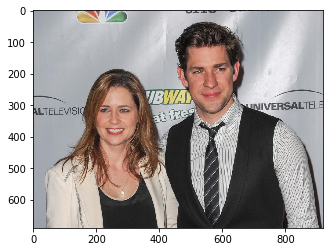

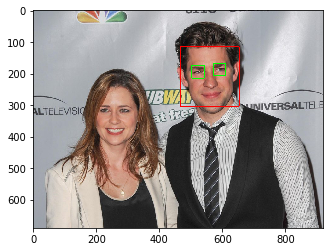

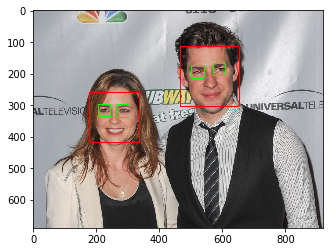

Number of eyes in given picture: 4
Number of faces in given picture 2


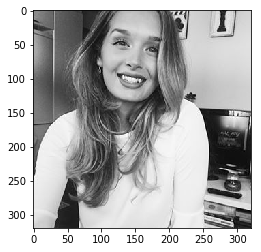

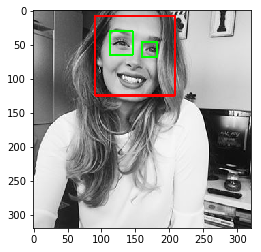

Number of eyes in given picture: 2
Number of faces in given picture 1


In [3]:
n=2
faces = []
'''
for img in imgPaths:
    print(img)
    img = cv2.imread(img)
    
'''

for i in range(n):
    e = 0
    f = 0
    i+=1
    sql="Select img_path from test4 where id=?"
    cursor.execute(sql,[(i)])
    img_list = cursor.fetchall()
    img = (img_list[0])
    
    ig = img[0]
    img = cv2.imread(img[0])
    
       
    face_cascade = cv2.CascadeClassifier("utils/haarcascade_frontalface_default.xml")
    eye_cascade = cv2.CascadeClassifier('utils/haarcascade_eye.xml')
    
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    detected_faces = face_cascade.detectMultiScale(gray)
    
    for(x, y, w, h) in detected_faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        
        eyes = eye_cascade.detectMultiScale(roi_gray)
        
        if len(eyes) > 1:
            faces.append(np.array(roi_color))
            
            cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
            f += 1
            
            for (ex,ey,ew,eh) in eyes:
                cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
                e+=1

            plt.imshow(img)
            plt.show()
    
    print("Number of eyes in given picture:", e)
    print("Number of faces in given picture", f)
    sql = "UPDATE test4 SET eyes =?, faces =? WHERE img_path =? "
    cursor.execute(sql, [(e),(f),(ig)])
    conn.commit()
    


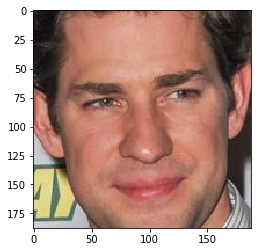

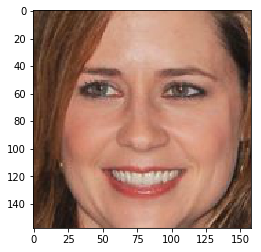

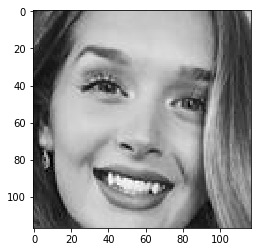

In [4]:
for face in faces:
    plt.imshow(face)
    plt.show()

In [ ]:
root = Tk()
i=1
sql="Select * from test4 where id=?"
cursor.execute(sql,[(i)])
img_list = cursor.fetchall()
img = (img_list[0])
im = img[1]
fa = img[3]
ey = img[2]
    
panel = Label(root, text=("Image:",img[1]))
panel.pack(side = "top", fill = "both", expand = "yes")
img = ImageTk.PhotoImage(Image.open(im))
panel = Label(root, image = img)
panel.pack(side = "top", fill = "both", expand = "yes")
panel = Label(root, text=("Number of faces recognized:",fa))
panel.pack(side = "top", fill = "both", expand = "yes")
panel = Label(root, text=("Number of eyes recognized:",ey))
panel.pack(side = "top", fill = "both", expand = "yes")
root.mainloop()



In [3]:
root = Tk()
i=2
sql="Select * from test4 where id=?"
cursor.execute(sql,[(i)])
img_list = cursor.fetchall()
img = (img_list[0])
im = img[1]
fa = img[3]
ey = img[2]
    
panel = Label(root, text=("Image:",img[1]))
panel.pack(side = "top", fill = "both", expand = "yes")
img = ImageTk.PhotoImage(Image.open(im))
panel = Label(root, image = img)
panel.pack(side = "top", fill = "both", expand = "yes")
panel = Label(root, text=("Number of faces recognized:",fa))
panel.pack(side = "top", fill = "both", expand = "yes")
panel = Label(root, text=("Number of eyes recognized:",ey))
panel.pack(side = "top", fill = "both", expand = "yes")
root.mainloop()
